In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.preprocessing import ICA
#mne.viz.set_3d_backend("notebook")
%matplotlib qt
%gui qt

In [4]:
samprate = 1024
references = ["M1", "M2"] 
hifilt = 40 
lowfilt = 0.5 
externos = {'EOG'} 

path_suj = 'C:/Users/Sebastian/Documents/NeuroZenProcessing/Participantes/Sujeto6_preprocesado.set'
path_guardar_suj = 'C:/Users/Sebastian/Documents/NeuroZenProcessing/Preprocessed/' 
name_guardar_suj = 'Suj_11_MF_py.mat'


In [5]:
raw_data = mne.io.read_raw_eeglab(path_suj, eog=externos, preload=True)
#print(raw_data.info['chs'])

#set channel names
eegbci.standardize(raw_data)

#set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw_data.set_montage(montage)

#set reference channels
raw_data, _ = mne.set_eeg_reference(raw_data, ref_channels=references)
print(raw_data.info['chs'])

Reading C:\Users\Sebastian\Documents\NeuroZenProcessing\Participantes\Sujeto6_preprocesado.fdt
Reading 0 ... 601065  =      0.000 ...   586.978 secs...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Sebastian\\Documents\\NeuroZenProcessing\\Participantes\\Sujeto6_preprocesado.fdt'

In [ ]:
#raw_data.plot_sensors(kind='3d')
#raw_data.plot(scalings = dict(eeg=200e-6));  #+/- 200 µV scale

In [4]:
raw_data.filter(l_freq=lowfilt, h_freq=hifilt)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)


- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    6.5s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,66 points
Good channels,"63 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.50 Hz
Lowpass,40.00 Hz


In [5]:
raw_data.resample(1024, npad='auto')
raw_data.info['sfreq']

Sampling frequency of the instance is already 1024.0, returning unmodified.


1024.0

Using matplotlib as 2D backend.


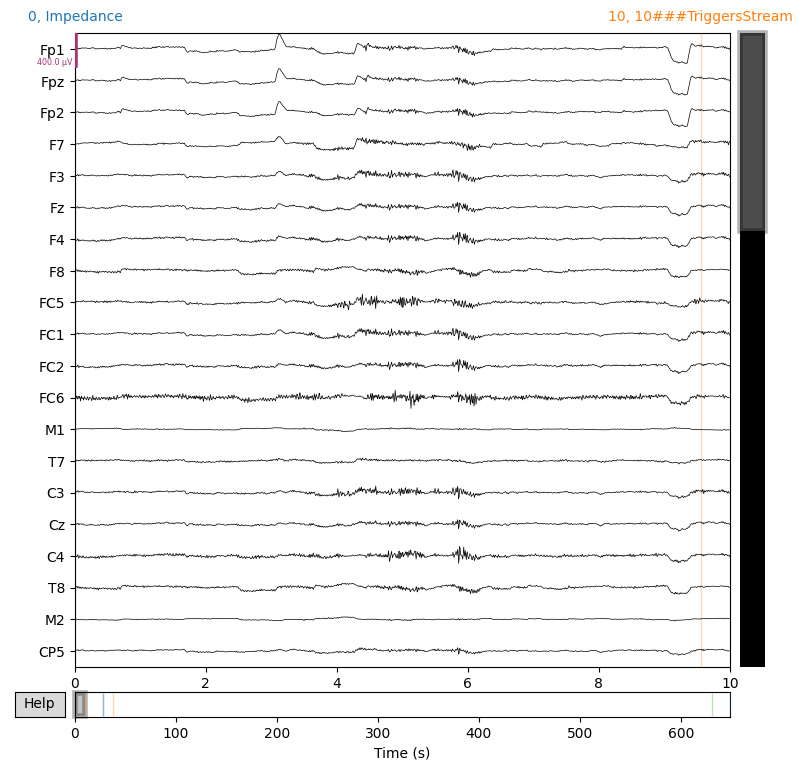

In [6]:
#check bad channels

raw_data.plot(scalings = dict(eeg=200e-6))

In [7]:
raw_data.info['bads'] = [] #note the bad channels
picks = mne.pick_types(raw_data.info, exclude='bads')


Setting channel interpolation method to {'eeg': 'spline'}.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4320\3698532916.py:1: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw_data.interpolate_bads(reset_bads=True)


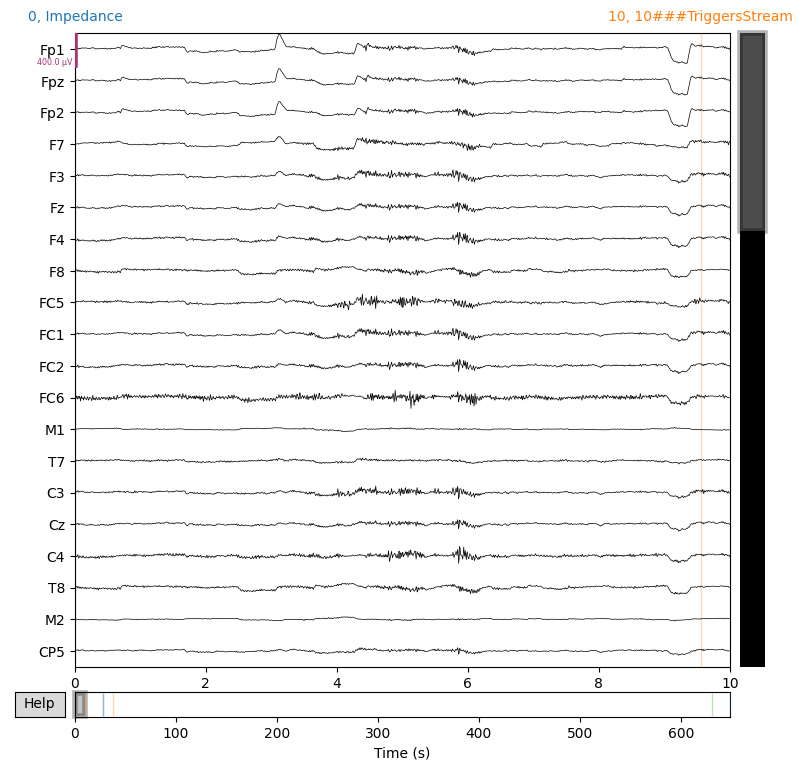

Channels marked as bad:
none
Channels marked as bad:
none


In [8]:
raw_data.interpolate_bads(reset_bads=True)
raw_data.plot(scalings=dict(eeg=200e-6))

In [10]:
num_components = 20
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw_data)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 83.3s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,71 iterations on raw data (664019 samples)
ICA components,20
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


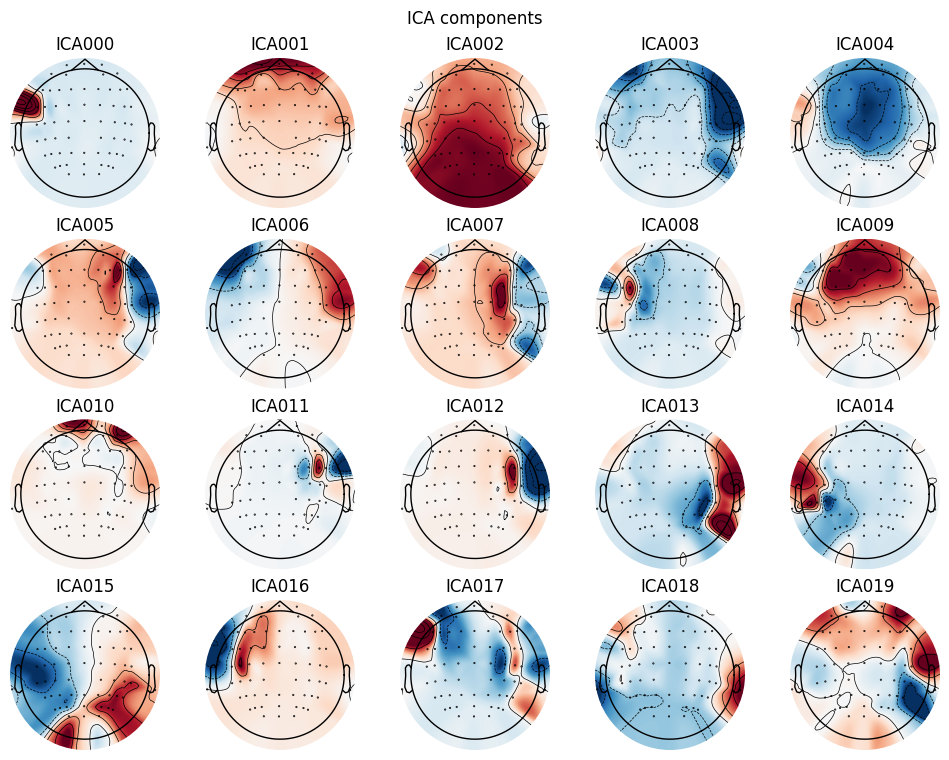

In [11]:
ica.plot_components()

In [ ]:
#raw_data.plot(n_channels=63, scalings=dict(eeg=100e-6)) 


In [ ]:
#ica.plot_properties(raw_data, picks=); # This exact component number probably won't work if you recompute ICA

In [ ]:
#ica.plot_overlay(raw, exclude=[])

In [20]:
ica.exclude = []
eog_indices, eog_scores = ica.find_bads_eog(raw_data)
ica.exclude = eog_indices

Using EOG channel: EOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [12]:
#barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

#plot diagnostics
ica.plot_properties(raw_data, picks=eog_indices)

#plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw_data, show_scrollbars=False)


NameError: name 'eog_scores' is not defined

Applying ICA to Raw instance


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components


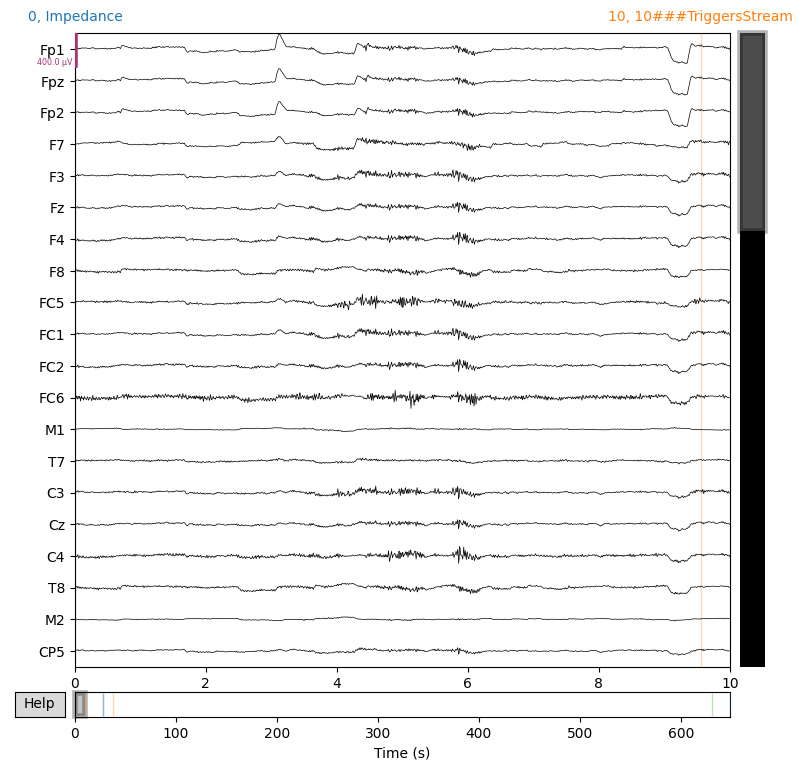

Channels marked as bad:
none


In [17]:
ica.apply(raw_data)
raw_data.plot(scalings=dict(eeg=200e-6))

In [14]:
print(raw_data.info["projs"])

[]


NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


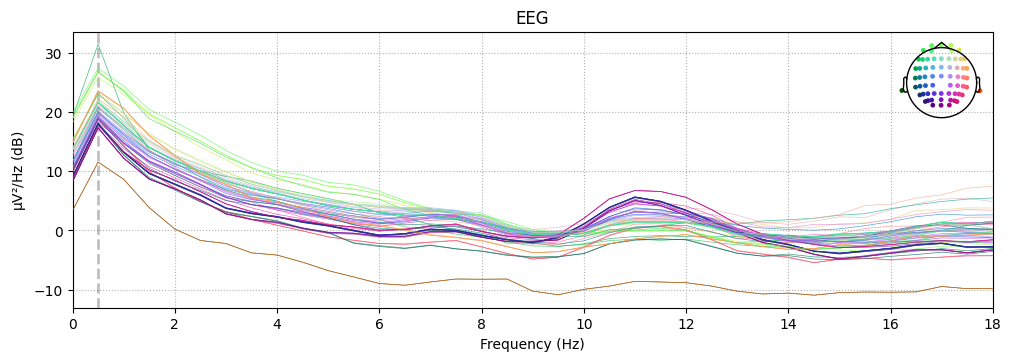

In [15]:
mne.viz.plot_raw_psd(raw_data, fmax=18, picks=['eeg'])

NOTE: plot_raw_psd_topo() is a legacy function. New code should use Raw.compute_psd().plot_topo().
Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


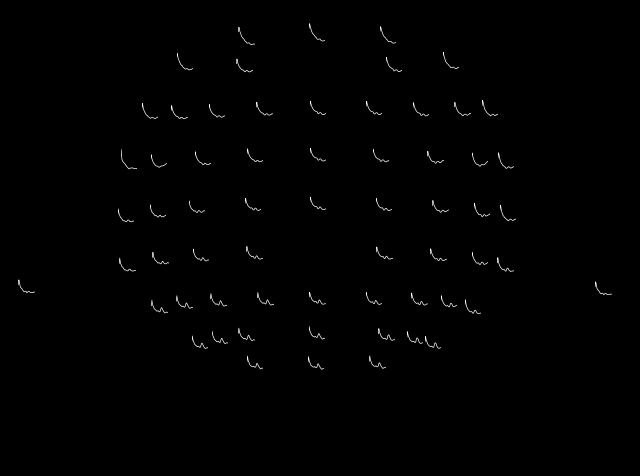

In [33]:
mne.viz.plot_raw_psd_topo(raw_data, fmax=18)

Effective window size : 2.000 (s)


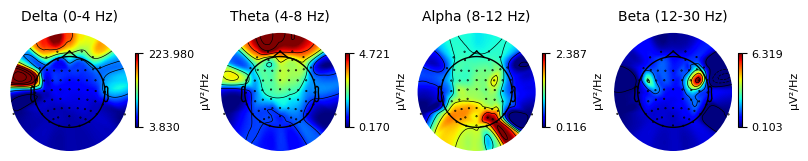

In [16]:
spectrum = raw_data.compute_psd()

bands = {'Delta (0-4 Hz)': (0, 4), 'Theta (4-8 Hz)': (4, 8),
         'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30)}

spectrum.plot_topomap(bands= bands,sphere='eeglab', ch_type='eeg', cmap='jet')